In [177]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [178]:
df_training = pd.read_csv("../data_mod/train_motion_data.csv")
df_test = pd.read_csv("../data_mod/test_motion_data.csv")

df_training

,AccX,AccY,GyroZ,Class,DiffAccX,DiffAccY
0,0.000000,0.000000,0.101938,NORMAL,0.000000,0.000000
1,-1.624864,-1.082492,0.135536,NORMAL,-1.624864,-1.082492
2,-0.594660,-0.122410,0.087888,NORMAL,1.030204,0.960082
3,0.738478,-0.228456,0.054902,NORMAL,1.333138,-0.106046
4,0.101741,0.777568,0.054902,NORMAL,-0.636737,1.006023
...,...,...,...,...,...,...
3639,0.915688,-2.017489,-1.236468,SLOW,2.374675,-1.824629
3640,-1.934203,0.914925,-0.477162,SLOW,-2.849891,2.932414
3641,-0.222845,0.747304,0.054291,SLOW,1.711359,-0.167621
3642,-0.349423,0.067261,-0.004963,SLOW,-0.126579,-0.680043


In [179]:
df_training.isna().sum()

AccX        0
AccY        0
GyroZ       0
Class       0
DiffAccX    0
DiffAccY    0
dtype: int64

In [180]:
df_training = df_training.replace(
    {"Class": {"NORMAL": 0, "AGGRESSIVE": 1, "SLOW": 2}})
df_test = df_test.replace(
    {"Class": {"NORMAL": 0, "AGGRESSIVE": 1, "SLOW": 2}})
df_training

,AccX,AccY,GyroZ,Class,DiffAccX,DiffAccY
0,0.000000,0.000000,0.101938,0,0.000000,0.000000
1,-1.624864,-1.082492,0.135536,0,-1.624864,-1.082492
2,-0.594660,-0.122410,0.087888,0,1.030204,0.960082
3,0.738478,-0.228456,0.054902,0,1.333138,-0.106046
4,0.101741,0.777568,0.054902,0,-0.636737,1.006023
...,...,...,...,...,...,...
3639,0.915688,-2.017489,-1.236468,2,2.374675,-1.824629
3640,-1.934203,0.914925,-0.477162,2,-2.849891,2.932414
3641,-0.222845,0.747304,0.054291,2,1.711359,-0.167621
3642,-0.349423,0.067261,-0.004963,2,-0.126579,-0.680043


In [181]:
X_train = df_training.drop(columns=["Class"])
X_train = (X_train - X_train.mean()) / X_train.std() * 100

X_train["Class"] = df_training["Class"]
X_train

,AccX,AccY,GyroZ,DiffAccX,DiffAccY,Class
0,-4.105593,8.126800,81.244480,0.010300,-0.010421,0
1,-168.957027,-111.696347,110.286351,-151.542377,-101.201825,0
2,-64.437130,-5.422989,69.099704,96.098456,89.738101,0
3,70.817107,-17.161393,40.585870,124.353421,-9.923577,0
4,6.216602,94.197287,40.585870,-59.378806,94.032688,0
...,...,...,...,...,...,...
3639,88.795978,-215.193071,-1075.677828,221.498566,-170.576840,2
3640,-200.341232,109.401604,-419.331681,-265.801873,274.111831,2
3641,-26.714411,90.847295,40.057837,159.630443,-15.679652,2
3642,-39.556507,15.572024,-11.161455,-11.795809,-63.580862,2


In [182]:
X_test = df_test.drop(columns="Class")
X_test = (X_test - X_test.mean()) / X_test.std() * 100

X_test["Class"] = df_test["Class"]
X_test

,AccX,AccY,GyroZ,DiffAccX,DiffAccY,Class
0,67.345100,-9.509000,-10.104756,-0.021340,-0.012385,1
1,57.982946,10.303100,188.298737,-8.494392,16.758078,1
2,270.452050,-824.010358,-43.597957,192.270076,-706.238535,1
3,229.805029,-828.171460,-55.972952,-36.808209,-3.534656,1
4,283.133326,-732.402479,20.967248,48.242495,81.053740,1
...,...,...,...,...,...,...
3079,-84.712435,-57.627689,445.483427,-73.609489,-1.097380,2
3080,145.444037,51.068429,-604.239195,208.277716,91.996249,2
3081,121.268079,-177.287100,-422.380477,-21.901364,-193.309813,2
3082,83.265000,79.069807,347.559582,-34.415357,216.987532,2


In [183]:
X_training  = X_train.drop(columns="Class")
y_training  = X_train.Class

X_testing = X_test.drop(columns="Class")
y_testing = X_test.Class

In [184]:
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [185]:
kmeans = KMeans(n_clusters=3, random_state=0, max_iter=400)
kmeans.fit(X_training)

KMeans(max_iter=400, n_clusters=3, random_state=0)

In [186]:
kmeans.labels_

array([0, 0, 1, ..., 1, 0, 1], dtype=int32)

In [187]:
kmeans.score(X_training, y_training)

-122089879.2330603

In [188]:
kmeans.score(X_testing, y_testing)

-105974789.25071318

### Understand the created model

In [189]:
y_pred = kmeans.predict(X_testing)

In [190]:
from sklearn import metrics

metrics.rand_score(y_testing, y_pred)

0.5525817703291511

In [191]:
df_results = df_test
df_results["Class"] = y_pred

labels = ["SLOW", "AGGRESSIVE", "NORMAL"]

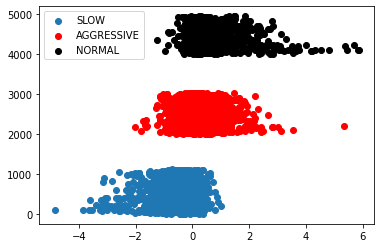

In [192]:

normal = df_results[df_results.Class == 0].AccX
plt.scatter(x = normal, y = np.arange(len(normal)), label=labels[0])

slow = df_results[df_results.Class == 1].AccX
plt.scatter(x = slow, y = np.arange(len(slow)) + 2000, color="red", label=labels[1])

aggressive = df_results[df_results.Class == 2].AccX
plt.scatter(x = aggressive, y = np.arange(len(aggressive)) + 4000, color="black", label=labels[2])

plt.legend()
plt.show()

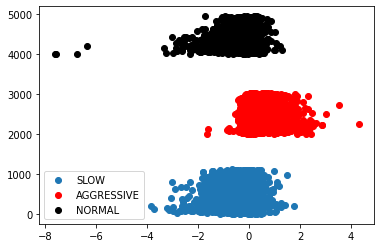

In [193]:

normal = df_results[df_results.Class == 0].AccY
plt.scatter(x = normal, y = np.arange(len(normal)), label=labels[0])

slow = df_results[df_results.Class == 1].AccY
plt.scatter(x = slow, y = np.arange(len(slow)) + 2000, color="red", label=labels[1])

aggressive = df_results[df_results.Class == 2].AccY
plt.scatter(x = aggressive, y = np.arange(len(aggressive)) + 4000, color="black", label=labels[2])

plt.legend()
plt.show()

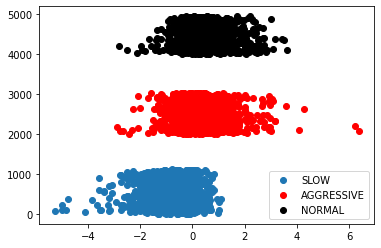

In [194]:
normal = df_results[df_results.Class == 0].DiffAccX
plt.scatter(x = normal, y = np.arange(len(normal)), label=labels[0])

slow = df_results[df_results.Class == 1].DiffAccX
plt.scatter(x = slow, y = np.arange(len(slow)) + 2000, color="red", label=labels[1])

aggressive = df_results[df_results.Class == 2].DiffAccX
plt.scatter(x = aggressive, y = np.arange(len(aggressive)) + 4000, color="black", label=labels[2])

plt.legend()
plt.show()

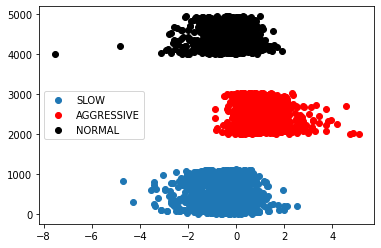

In [195]:
normal = df_results[df_results.Class == 0].DiffAccY
plt.scatter(x = normal, y = np.arange(len(normal)), label=labels[0])

slow = df_results[df_results.Class == 1].DiffAccY
plt.scatter(x = slow, y = np.arange(len(slow)) + 2000, color="red", label=labels[1])

aggressive = df_results[df_results.Class == 2].DiffAccY
plt.scatter(x = aggressive, y = np.arange(len(aggressive)) + 4000, color="black", label=labels[2])

plt.legend()
plt.show()

In [196]:
"""normal = df_results[df_results.Class == 0].VelX
plt.scatter(x = normal, y = np.arange(len(normal)), label=labels[0])

slow = df_results[df_results.Class == 1].VelX
plt.scatter(x = slow, y = np.arange(len(slow)) + 2000, color="red", label=labels[1])

aggressive = df_results[df_results.Class == 2].VelX
plt.scatter(x = aggressive, y = np.arange(len(aggressive)) + 4000, color="black", label=labels[2])

plt.legend()
plt.show()"""

'normal = df_results[df_results.Class == 0].VelX\nplt.scatter(x = normal, y = np.arange(len(normal)), label=labels[0])\n\nslow = df_results[df_results.Class == 1].VelX\nplt.scatter(x = slow, y = np.arange(len(slow)) + 2000, color="red", label=labels[1])\n\naggressive = df_results[df_results.Class == 2].VelX\nplt.scatter(x = aggressive, y = np.arange(len(aggressive)) + 4000, color="black", label=labels[2])\n\nplt.legend()\nplt.show()'

In [197]:
"""normal = df_results[df_results.Class == 0].VelY
plt.scatter(x = normal, y = np.arange(len(normal)), label=labels[0])

slow = df_results[df_results.Class == 1].VelY
plt.scatter(x = slow, y = np.arange(len(slow)) + 2000, color="red", label=labels[1])

aggressive = df_results[df_results.Class == 2].VelY
plt.scatter(x = aggressive, y = np.arange(len(aggressive)) + 4000, color="black", label=labels[2])

plt.legend()
plt.show()"""

'normal = df_results[df_results.Class == 0].VelY\nplt.scatter(x = normal, y = np.arange(len(normal)), label=labels[0])\n\nslow = df_results[df_results.Class == 1].VelY\nplt.scatter(x = slow, y = np.arange(len(slow)) + 2000, color="red", label=labels[1])\n\naggressive = df_results[df_results.Class == 2].VelY\nplt.scatter(x = aggressive, y = np.arange(len(aggressive)) + 4000, color="black", label=labels[2])\n\nplt.legend()\nplt.show()'

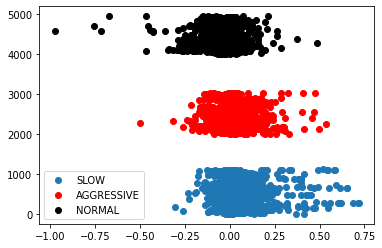

In [198]:
normal = df_results[df_results.Class == 0].GyroZ
plt.scatter(x = normal, y = np.arange(len(normal)), label=labels[0])

slow = df_results[df_results.Class == 1].GyroZ
plt.scatter(x = slow, y = np.arange(len(slow)) + 2000, color="red", label=labels[1])

aggressive = df_results[df_results.Class == 2].GyroZ
plt.scatter(x = aggressive, y = np.arange(len(aggressive)) + 4000, color="black", label=labels[2])

plt.legend()
plt.show()

<AxesSubplot:xlabel='AccX', ylabel='AccY'>

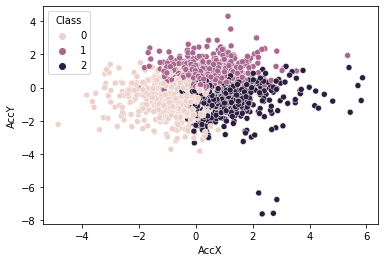

In [199]:
sns.scatterplot(data=df_results, x="AccX", y="AccY", hue="Class")

<AxesSubplot:xlabel='DiffAccX', ylabel='DiffAccY'>

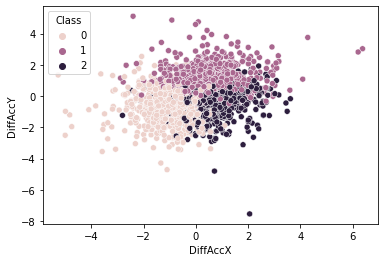

In [200]:
sns.scatterplot(data=df_results, x="DiffAccX", y="DiffAccY", hue="Class")